In [1]:
# Imports

from statsmodels.stats import diagnostic
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set_theme()

# Load the statistical libraries

In [2]:
# Data Imports

year_grocery = pd.read_csv("data/year_osward_grocery.csv")
display(year_grocery)

wellbeing_data = pd.read_excel(
    "data/london-ward-well-being-probability-scores.xls", sheet_name="Data")
display(wellbeing_data.head())

wellbeing_scores = pd.read_excel(
    "data/london-ward-well-being-probability-scores.xls", sheet_name="Scores", header=[0, 1])
display(wellbeing_scores.head())

wellbeing_final_scores = pd.read_excel(
    "data/london-ward-well-being-probability-scores.xls", sheet_name="Ranked", header=[3], usecols="B:C")
display(wellbeing_final_scores)

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E05000026,449.535137,32.5,166.4,300.0,500.0,1500.0,771.349423,3.716832,125.960833,...,37315,14370.0,7469.0,6901.0,4211.0,9421.0,738.0,29.572999,1.26,11404.761905
1,E05000027,413.130263,32.5,150.0,300.0,500.0,1500.0,626.395178,5.164174,110.664114,...,14474,10845.0,5228.0,5617.0,3205.0,6608.0,1032.0,33.568004,1.36,7974.264706
2,E05000028,407.100472,32.5,160.0,300.0,500.0,1200.0,545.890959,2.710677,121.990710,...,32138,13856.0,6750.0,7106.0,4180.0,8537.0,1139.0,32.032693,1.29,10741.085271
3,E05000029,384.173858,30.0,150.0,250.0,454.0,1500.0,591.837557,4.968373,122.245578,...,16223,10850.0,5300.0,5550.0,3023.0,6251.0,1576.0,36.004793,3.38,3210.059172
4,E05000030,356.882607,30.0,140.0,250.0,450.0,1000.0,465.284180,3.880963,109.959688,...,17522,11348.0,5515.0,5833.0,2747.0,6961.0,1640.0,37.247444,3.45,3289.275362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,E05011485,347.127333,30.0,150.0,250.0,450.0,1000.0,404.406795,1.640905,104.564209,...,72979,18010.0,8569.0,9441.0,4752.0,11588.0,1670.0,34.588840,2.14,8415.887850
634,E05011486,369.585206,32.5,150.0,280.0,475.0,1000.0,422.180212,1.928714,105.777577,...,51255,17298.0,8182.0,9116.0,4762.0,10841.0,1695.0,34.923633,1.69,10235.502959
635,E05011487,323.975163,30.0,135.0,240.0,400.0,1000.0,391.775528,3.095665,106.126930,...,20568,15592.0,7594.0,7998.0,4160.0,9750.0,1682.0,35.029374,2.62,5951.145038
636,E05011488,380.380242,32.5,150.0,270.0,460.0,1200.0,536.688582,2.967849,106.437623,...,33388,18271.0,8873.0,9398.0,5099.0,11378.0,1794.0,34.147720,1.97,9274.619289


,Old Ward Code,New ward code,Ward,Borough,Life Expectancy 2005-2009,Life Expectancy 2006-2010,Life Expectancy 2007-11,Life Expectancy 2008-12,Life Expectancy 2009-13,Childhood Obesity 2009,...,"Homes with access to open space & nature, and % greenspace - 2009","Homes with access to open space & nature, and % greenspace - 2010","Homes with access to open space & nature, and % greenspace - 2011","Homes with access to open space & nature, and % greenspace - 2012","Homes with access to open space & nature, and % greenspace - 2013","Subjective well-being average score, 2011/12 and 2012/13","Subjective well-being average score, 2011/12 and 2012/13.1","Subjective well-being average score, 2011/12 and 2012/13.2","Subjective well-being average score, 2011/12 and 2012/13.3","Subjective well-being average score, 2013"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00AA,E09000001,City of London,City of London,84.3294,83.730426,83.704458,84.482365,86.393685,22.22,...,-6.47875,-6.478752,-6.478752,-6.478752,-6.478752,7.64033,7.640332,7.640332,7.640332,7.655963
2,00ABFX,E05000026,Abbey,Barking and Dagenham,82.0761,82.482712,82.132476,81.122613,81.998428,21.7009,...,-0.889538,-0.889538,-0.889538,-0.889538,-0.889538,7.89796,7.897959,7.897959,7.897959,7.789197
3,00ABFY,E05000027,Alibon,Barking and Dagenham,77.8284,78.266936,78.301335,78.145305,78.989687,25.974,...,-1.79097,-1.790968,-1.790968,-1.790968,-1.790968,7.35884,7.358842,7.358842,7.358842,7.553030
4,00ABFZ,E05000028,Becontree,Barking and Dagenham,78.4307,78.914120,78.721642,79.019303,79.229604,22.449,...,-5.46967,-5.469666,-5.469666,-5.469666,-5.469666,7.60912,7.609123,7.609123,7.609123,7.551141


Old Ward Code New ward code       Ward name               Borough  \
  Old Ward Code New ward code       Ward name               Borough   
0          00AA     E09000001  City of London        City of London   
1        00ABFX     E05000026           Abbey  Barking and Dagenham   
2        00ABFY     E05000027          Alibon  Barking and Dagenham   
3        00ABFZ     E05000028       Becontree  Barking and Dagenham   
4        00ABGA     E05000029  Chadwell Heath  Barking and Dagenham   

  Life Expectancy                                              \
             2009       2010       2011       2012       2013   
0         18.7787  14.927723  13.653698  16.026485  23.661861   
1         9.10692   9.583198   6.867900   1.417979   4.251859   
2        -9.12595  -8.474883  -9.670047 -11.527627  -9.035117   
3        -6.54069  -5.702701  -7.855704  -7.727404  -7.975613   
4       -0.285993  -2.129908  -0.888760  -3.151067  -1.211477   

  Childhood Obesity  ...  \
               2009  ...   
0          -7.17432  ...   
1          -6.11698  ...   
2          -14.8205  ...   
3           -7.6407  ...   
4          -10.3826  ...   

  Homes with access to open space & nature, and % greenspace            \
                                                        2009      2010   
0                                           -9.52981         -9.529812   
1                                           -1.30845         -1.308451   
2                                           -2.63439         -2.634394   
3                                           -8.04551         -8.045513   
4                                            2.90909          2.909091   

                                Subjective well-being average score  \
       2011      2012      2013                                2009   
0 -9.529812 -9.529812 -9.529812                                   0   
1 -1.308451 -1.308451 -1.308451                             8.09781   
2 -2.634394 -2.634394 -2.634394                            -8.84788   
3 -8.045513 -8.045513 -8.045513                           -0.980979   
4  2.909091  2.909091  2.909091                             -16.729   

                                              
        2010       2011       2012      2013  
0   0.000000   0.000000   0.000000  0.000000  
1   8.097813   8.097813   8.097813  6.118185  
2  -8.847876  -8.847876  -8.847876 -4.726708  
3  -0.980979  -0.980979  -0.980979 -4.813479  
4 -16.729023 -16.729023 -16.729023 -4.813479  

[5 rows x 64 columns]

,Index Score 2013,Ward
0,17.217884,Knightsbridge and Belgravia
1,13.741583,Campden
2,11.572839,West Wickham
3,11.566019,South Twickenham
4,11.435223,East Sheen
...,...,...
620,-12.825333,Upper Edmonton
621,-12.889626,Northumberland Park
622,-13.472226,Harlesden
623,-13.817601,Fieldway


In [3]:
# year_grocery=year_grocery.sort_values(by='representativeness_norm', ascending=False, ignore_index=True)
year_grocery = year_grocery.nlargest(
    int(0.8*len(year_grocery)), 'representativeness_norm')

In [4]:
display(year_grocery)

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
570,E05011117,382.039628,40.0,175.0,300.0,500.0,1000.0,363.202381,0.465398,105.990925,...,369500,11911.0,6099.0,5812.0,1558.0,9552.0,801.0,34.867937,1.35,8822.962963
565,E05011112,398.825948,40.0,180.0,320.0,500.0,1000.0,397.149657,0.492467,107.602664,...,407552,16365.0,8103.0,8262.0,2997.0,12218.0,1150.0,33.235625,1.30,12588.461538
246,E05000336,397.066289,40.0,180.0,300.0,500.0,1000.0,414.783419,0.608474,122.609742,...,273000,11959.0,5764.0,6195.0,2625.0,7194.0,2140.0,40.250941,3.32,3602.108434
438,E05000605,416.199096,40.5,182.0,325.0,500.0,1200.0,506.239533,0.700727,107.997869,...,273260,13599.0,7196.0,6403.0,2630.0,9919.0,1050.0,34.684389,1.31,10380.916031
162,E05000252,374.792470,40.0,173.7,300.0,500.0,1000.0,354.119901,0.563867,99.371843,...,247606,12013.0,5828.0,6185.0,1709.0,8813.0,1491.0,37.502289,0.89,13497.752809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,E05000114,337.091446,25.0,130.0,250.0,440.0,1000.0,403.427998,2.829008,101.791816,...,26308,16594.0,7755.0,8839.0,4177.0,9698.0,2719.0,37.793660,13.29,1248.607976
255,E05000345,331.120657,28.0,135.0,250.0,420.0,1000.0,375.534166,3.745168,108.422901,...,13036,13874.0,6889.0,6985.0,3515.0,8972.0,1387.0,34.132334,4.01,3459.850374
266,E05000356,351.524568,30.0,150.0,250.0,450.0,1000.0,384.612740,3.651894,115.761322,...,13965,12795.0,6629.0,6166.0,3012.0,8330.0,1453.0,35.510981,2.01,6365.671642
4,E05000030,356.882607,30.0,140.0,250.0,450.0,1000.0,465.284180,3.880963,109.959688,...,17522,11348.0,5515.0,5833.0,2747.0,6961.0,1640.0,37.247444,3.45,3289.275362


In [5]:
wellbeing_scores = wellbeing_scores.loc[:, (slice(
    None), [2013, "New ward code", "Ward name", "Borough"])].dropna(how="all")
wellbeing_scores = wellbeing_scores.droplevel(1, axis=1)
display(wellbeing_scores)

,New ward code,Ward name,Borough,Life Expectancy,Childhood Obesity,Incapacity Benefit rate,Unemployment rate,Crime rate - Index,Deliberate Fires,Average Capped GCSE and Equivalent Point Score Per Pupil,Unauthorised Absence in All Schools (%),Dependent children in out-of-work families,Public Transport Accessibility,"Homes with access to open space & nature, and % greenspace",Subjective well-being average score
0,E09000001,City of London,City of London,23.661861,-19.399351,15.136349,8.610513,17.205862,5.606699,10.348951,11.827561,8.094587,29.202424,-9.529812,0.000000
1,E05000026,Abbey,Barking and Dagenham,4.251859,-8.272848,3.953790,-11.228402,-18.441350,-15.314186,-4.528620,-7.570297,-9.420035,15.818063,-1.308451,6.118185
2,E05000027,Alibon,Barking and Dagenham,-9.035117,-12.944834,-20.398595,-15.084810,-9.218119,-3.905882,-10.941296,-11.507206,-17.164782,-4.501940,-2.634394,-4.726708
3,E05000028,Becontree,Barking and Dagenham,-7.975613,-18.487966,-7.354425,-14.275467,-13.060348,1.890929,-12.819252,-10.803760,-16.413721,-6.460879,-8.045513,-4.813479
4,E05000029,Chadwell Heath,Barking and Dagenham,-1.211477,-19.346426,-11.983294,-10.292302,-6.060588,-31.284887,-6.503490,-14.903977,-12.907861,-10.826177,2.909091,-4.813479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,E09000029,SUTTON,Sutton,5.351062,0.229239,8.451536,4.969422,1.193134,-3.518120,11.980036,2.956890,4.763430,-6.587229,-0.762555,6.579079
655,E09000030,TOWER HAMLETS,Tower Hamlets,-6.477760,-13.266398,-0.606568,-12.021100,-1.357916,-16.814550,0.506199,0.000000,-18.017343,8.906664,0.111718,14.366305
656,E09000031,WALTHAM FOREST,Waltham Forest,1.462313,-5.984291,-2.974294,-9.704928,-11.270727,0.121327,-0.731176,-2.956890,-4.677034,-1.341525,9.850219,5.214071
657,E09000032,WANDSWORTH,Wandsworth,0.810493,-2.176468,8.278417,4.360513,-7.482790,5.601234,5.399453,2.956890,0.418811,3.452713,-2.085239,0.077371


In [6]:
wellbeing_scores = pd.merge(
    left=wellbeing_scores, right=wellbeing_final_scores, left_on='Ward name', right_on="Ward")
wellbeing_scores = wellbeing_scores.drop("Ward", axis=1)
display(wellbeing_scores)

,New ward code,Ward name,Borough,Life Expectancy,Childhood Obesity,Incapacity Benefit rate,Unemployment rate,Crime rate - Index,Deliberate Fires,Average Capped GCSE and Equivalent Point Score Per Pupil,Unauthorised Absence in All Schools (%),Dependent children in out-of-work families,Public Transport Accessibility,"Homes with access to open space & nature, and % greenspace",Subjective well-being average score,Index Score 2013
0,E09000001,City of London,City of London,23.661861,-19.399351,15.136349,8.610513,17.205862,5.606699,10.348951,11.827561,8.094587,29.202424,-9.529812,0.000000,8.397137
1,E05000026,Abbey,Barking and Dagenham,4.251859,-8.272848,3.953790,-11.228402,-18.441350,-15.314186,-4.528620,-7.570297,-9.420035,15.818063,-1.308451,6.118185,5.158493
2,E05000026,Abbey,Barking and Dagenham,4.251859,-8.272848,3.953790,-11.228402,-18.441350,-15.314186,-4.528620,-7.570297,-9.420035,15.818063,-1.308451,6.118185,-3.828524
3,E05000455,Abbey,Merton,1.954939,6.874674,14.659226,9.631054,1.193650,2.594187,8.906345,10.408799,3.096512,9.678513,-1.195187,-5.900801,5.158493
4,E05000455,Abbey,Merton,1.954939,6.874674,14.659226,9.631054,1.193650,2.594187,8.906345,10.408799,3.096512,9.678513,-1.195187,-5.900801,-3.828524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,E05000645,Tachbrook,Westminster,12.150282,-13.300090,-0.370132,7.183482,-4.158434,5.847766,1.665093,4.572511,-5.566818,19.907635,11.295334,16.097385,4.610334
665,E05000646,Vincent Square,Westminster,6.328501,-6.300232,-11.391662,2.898492,10.809466,6.890939,9.354098,8.700161,-4.669857,22.376151,14.032837,16.097385,6.260523
666,E05000647,Warwick,Westminster,14.434530,-4.345072,-3.708389,3.798810,2.948651,8.973959,6.066813,-2.239071,-5.661689,24.639497,5.057604,16.097385,5.505252
667,E05000648,Westbourne,Westminster,-12.210252,-14.910470,-38.309279,-12.637567,-6.087057,7.818684,13.215315,-2.946717,-27.284950,8.097375,8.208277,15.507184,-5.128288


In [7]:
list_column = ["area_id", "energy_tot", "energy_fat", "energy_saturate", "energy_sugar", "energy_protein", "energy_carb",
               "energy_fibre", "energy_alcohol", "h_nutrients_calories"]
year_grocery = year_grocery.loc[:,
                                year_grocery.columns.isin(list(list_column))]
display(year_grocery)

wellbeing_data = wellbeing_data.filter(
    regex=r'(2013$|-13$|New ward code|Ward$|Borough)')
display(wellbeing_data)

,area_id,energy_fat,energy_saturate,energy_sugar,energy_protein,energy_carb,energy_fibre,energy_alcohol,energy_tot,h_nutrients_calories
570,E05011117,78.438016,30.789383,34.635855,22.770981,65.237562,3.026622,1.892084,171.365266,1.608028
565,E05011112,78.516170,30.681996,36.415653,22.396706,68.789239,2.984949,1.558974,174.246039,1.589399
246,E05000336,78.864004,32.414378,38.719523,21.433875,71.160848,2.994211,1.741239,176.194176,1.582813
438,E05000605,84.561946,33.918637,36.141050,22.015479,69.832483,3.067818,1.697021,181.174746,1.575484
162,E05000252,80.542785,31.635739,33.648475,22.141379,61.322242,3.149138,1.689631,168.845175,1.598050
...,...,...,...,...,...,...,...,...,...,...
67,E05000114,82.445510,31.736518,47.351063,21.094804,82.347354,3.048458,1.509801,190.445927,1.548338
255,E05000345,84.358418,33.476880,45.331195,20.669797,78.696211,2.965964,1.698930,188.389319,1.550454
266,E05000356,86.293935,34.467013,42.264284,20.607400,75.573588,3.178303,1.352839,187.006066,1.545090
4,E05000030,84.436271,32.531970,45.331593,21.228013,78.325611,2.963643,1.182663,188.136201,1.540547


,New ward code,Ward,Borough,Life Expectancy 2009-13,Childhood Obesity 2013,Incapacity Benefit rate - 2013,Unemployment rate 2013,Crime rate - 2013,Deliberate Fires - 2013,GCSE point scores - 2013,Unauthorised Absence in All Schools (%) - 2013,% dependent children in out-of-work households - 2013,Public Transport Accessibility - 2013,"Homes with access to open space & nature, and % greenspace - 2013","Subjective well-being average score, 2013"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,City of London,City of London,86.393685,28.810000,0.806452,2.234870,13.977435,0.250000,360.400000,0.700000,10.000000,7.862302,-6.478752,7.655963
2,E05000026,Abbey,Barking and Dagenham,81.998428,23.214286,1.562500,8.905805,120.785575,1.159420,333.948305,1.356022,25.384615,5.989365,-0.889538,7.789197
3,E05000027,Alibon,Barking and Dagenham,78.989687,25.563910,3.208955,10.202542,93.150424,0.663507,322.546835,1.489166,32.187500,3.145890,-1.790968,7.553030
4,E05000028,Becontree,Barking and Dagenham,79.229604,28.351648,2.327044,9.930396,104.662722,0.411523,319.207910,1.465376,31.527778,2.871766,-5.469666,7.551141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,E09000033,WESTMINSTER,Westminster,83.471142,24.646521,2.162972,4.252854,76.025424,0.137259,353.900000,1.200000,23.337612,6.468800,4.895623,7.998267
660,NaN,NaN,Standard Deviation,2.264429,5.029176,0.676096,3.362550,29.962551,0.434695,17.779579,0.338193,8.783869,1.399348,6.798406,0.217767
661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
wellbeing_data.dropna(how='all', axis=0)

,New ward code,Ward,Borough,Life Expectancy 2009-13,Childhood Obesity 2013,Incapacity Benefit rate - 2013,Unemployment rate 2013,Crime rate - 2013,Deliberate Fires - 2013,GCSE point scores - 2013,Unauthorised Absence in All Schools (%) - 2013,% dependent children in out-of-work households - 2013,Public Transport Accessibility - 2013,"Homes with access to open space & nature, and % greenspace - 2013","Subjective well-being average score, 2013"
1,E09000001,City of London,City of London,86.393685,28.810000,0.806452,2.234870,13.977435,0.250000,360.400000,0.700000,10.000000,7.862302,-6.478752,7.655963
2,E05000026,Abbey,Barking and Dagenham,81.998428,23.214286,1.562500,8.905805,120.785575,1.159420,333.948305,1.356022,25.384615,5.989365,-0.889538,7.789197
3,E05000027,Alibon,Barking and Dagenham,78.989687,25.563910,3.208955,10.202542,93.150424,0.663507,322.546835,1.489166,32.187500,3.145890,-1.790968,7.553030
4,E05000028,Becontree,Barking and Dagenham,79.229604,28.351648,2.327044,9.930396,104.662722,0.411523,319.207910,1.465376,31.527778,2.871766,-5.469666,7.551141
5,E05000029,Chadwell Heath,Barking and Dagenham,80.761295,28.783383,2.640000,8.591037,83.689654,1.853659,330.437069,1.604042,28.448276,2.260909,1.977718,7.551141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,E09000030,TOWER HAMLETS,Tower Hamlets,79.568782,25.725630,1.870824,9.172354,69.599249,1.224640,342.900000,1.100000,32.936378,5.022220,0.075951,7.968814
657,E09000031,WALTHAM FOREST,Waltham Forest,81.366755,22.063330,2.030905,8.393529,99.300560,0.488446,340.700000,1.200000,21.218425,3.588142,6.696578,7.769508
658,E09000032,WANDSWORTH,Wandsworth,81.219155,20.148309,1.270114,3.663954,87.950935,0.250238,351.600000,1.000000,16.742301,4.259023,-1.417630,7.657647
659,E09000033,WESTMINSTER,Westminster,83.471142,24.646521,2.162972,4.252854,76.025424,0.137259,353.900000,1.200000,23.337612,6.468800,4.895623,7.998267


In [9]:
len(set(wellbeing_data["New ward code"].values))

660

In [10]:
len(set(wellbeing_scores["New ward code"].values))

625

In [11]:
len(set(year_grocery["area_id"].values))

510

In [12]:
len(set(wellbeing_data["New ward code"].values)
    & set(year_grocery["area_id"].values))

387

In [13]:
wellbeing_grocery = pd.merge(
    left=year_grocery, right=wellbeing_data, left_on='area_id', right_on="New ward code")
wellbeing_grocery = wellbeing_grocery.drop("New ward code", axis=1)
display(wellbeing_grocery)

,area_id,energy_fat,energy_saturate,energy_sugar,energy_protein,energy_carb,energy_fibre,energy_alcohol,energy_tot,h_nutrients_calories,...,Incapacity Benefit rate - 2013,Unemployment rate 2013,Crime rate - 2013,Deliberate Fires - 2013,GCSE point scores - 2013,Unauthorised Absence in All Schools (%) - 2013,% dependent children in out-of-work households - 2013,Public Transport Accessibility - 2013,"Homes with access to open space & nature, and % greenspace - 2013","Subjective well-being average score, 2013"
0,E05000336,78.864004,32.414378,38.719523,21.433875,71.160848,2.994211,1.741239,176.194176,1.582813,...,1.523179,2.647678,48.562193,0.418410,358.187156,0.614275,11.111111,2.039147,3.736855,7.658077
1,E05000605,84.561946,33.918637,36.141050,22.015479,69.832483,3.067818,1.697021,181.174746,1.575484,...,1.959799,7.287610,116.889201,0.226415,351.874227,1.004181,14.716981,5.478238,-2.960854,7.744466
2,E05000252,80.542785,31.635739,33.648475,22.141379,61.322242,3.149138,1.689631,168.845175,1.598050,...,1.658031,4.382415,49.119898,0.080000,375.502532,1.086762,13.243243,6.039024,-9.691271,7.866023
3,E05000427,77.568453,30.521094,35.742617,22.364672,66.992603,2.985766,1.760651,171.672145,1.600125,...,2.352941,8.867583,106.803894,0.134228,350.764912,0.854663,26.379310,6.302998,-9.260125,7.694809
4,E05000595,82.975277,33.302798,37.707033,21.336347,71.447922,2.947414,1.372449,180.079409,1.559561,...,2.131148,7.131374,85.597291,0.384615,331.814679,1.148035,14.032258,4.348486,6.590406,7.744466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,E05000114,82.445510,31.736518,47.351063,21.094804,82.347354,3.048458,1.509801,190.445927,1.548338,...,1.832461,5.880663,90.046368,2.420382,343.303488,1.658821,27.073171,2.127478,11.543825,7.583747
383,E05000345,84.358418,33.476880,45.331195,20.669797,78.696211,2.965964,1.698930,188.389319,1.550454,...,2.131148,5.062424,79.353909,1.549815,307.699405,1.492693,23.943662,2.549629,-2.893946,7.719683
384,E05000356,86.293935,34.467013,42.264284,20.607400,75.573588,3.178303,1.352839,187.006066,1.545090,...,1.329480,4.402869,64.337983,0.476190,355.988608,1.033394,19.180328,2.323684,6.135752,7.461775
385,E05000030,84.436271,32.531970,45.331593,21.228013,78.325611,2.963643,1.182663,188.136201,1.540547,...,1.942446,8.293168,61.601286,1.121495,350.136306,1.208078,23.518519,2.305719,5.687552,7.553030


In [14]:
# Comprehension of the data
wellbeing_grocery_columns = wellbeing_grocery.columns.values.tolist()
wellbeing_grocery_columns

['area_id',
 'energy_fat',
 'energy_saturate',
 'energy_sugar',
 'energy_protein',
 'energy_carb',
 'energy_fibre',
 'energy_alcohol',
 'energy_tot',
 'h_nutrients_calories',
 'Ward',
 'Borough',
 'Life Expectancy 2009-13',
 'Childhood Obesity 2013',
 'Incapacity Benefit rate - 2013',
 'Unemployment rate 2013',
 'Crime rate - 2013',
 'Deliberate Fires - 2013',
 'GCSE point scores - 2013',
 'Unauthorised Absence in All Schools (%) - 2013',
 '% dependent children in out-of-work households - 2013',
 'Public Transport Accessibility - 2013',
 'Homes with access to open space & nature, and % greenspace - 2013',
 'Subjective well-being average score, 2013']

In [15]:
wellbeing_grocery.isnull().any()

area_id                                                              False
energy_fat                                                           False
energy_saturate                                                      False
energy_sugar                                                         False
energy_protein                                                       False
energy_carb                                                          False
energy_fibre                                                         False
energy_alcohol                                                       False
energy_tot                                                           False
h_nutrients_calories                                                 False
Ward                                                                 False
Borough                                                              False
Life Expectancy 2009-13                                              False
Childhood Obesity 2013   

In [16]:
wellbeing_grocery.describe()

,energy_fat,energy_saturate,energy_sugar,energy_protein,energy_carb,energy_fibre,energy_alcohol,energy_tot,h_nutrients_calories,Life Expectancy 2009-13,...,Incapacity Benefit rate - 2013,Unemployment rate 2013,Crime rate - 2013,Deliberate Fires - 2013,GCSE point scores - 2013,Unauthorised Absence in All Schools (%) - 2013,% dependent children in out-of-work households - 2013,Public Transport Accessibility - 2013,"Homes with access to open space & nature, and % greenspace - 2013","Subjective well-being average score, 2013"
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,...,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,80.817939,31.894891,40.299017,21.084450,72.228393,3.030440,1.672927,178.834149,1.571868,82.034579,...,1.750951,6.067699,82.722343,0.432580,349.095358,1.090582,18.643395,3.782917,-0.468153,7.641786
std,2.831519,1.383246,3.218686,0.888155,5.274501,0.122287,0.346390,6.915372,0.024027,2.163095,...,0.640063,3.297407,27.606836,0.372238,17.137899,0.354373,8.123145,1.333603,6.629164,0.212650
min,67.111854,26.283257,33.119113,17.596480,58.462154,2.750710,0.715793,156.104396,1.465237,75.984346,...,0.283019,0.895164,30.058750,0.000000,298.841228,0.295126,0.769231,1.436150,-22.256753,7.155185
25%,79.141663,31.034293,38.116707,20.679623,68.487344,2.947350,1.432738,174.376402,1.556581,80.555017,...,1.282745,3.437811,63.725814,0.180180,336.652998,0.845809,12.065574,2.764636,-5.132616,7.461651
50%,80.586620,31.744098,39.798689,21.269757,72.313496,3.024360,1.669184,179.013866,1.573583,82.046553,...,1.711712,5.461818,78.090420,0.333333,347.714444,1.063983,19.066667,3.403513,-0.323641,7.655521
75%,82.306504,32.627148,42.249893,21.684625,75.892242,3.102874,1.871772,182.886071,1.589406,83.434502,...,2.152192,8.052582,96.973319,0.577479,359.655087,1.311744,24.042254,4.532693,4.129729,7.746910
max,92.440804,38.690892,48.719140,23.005837,84.618879,3.617668,3.147601,197.674474,1.641436,88.450614,...,4.805195,23.509452,208.565427,2.420382,397.661364,2.241091,41.076923,7.996289,18.308534,8.155632


Text(0.5, 0.98, 'boxplot for each column')

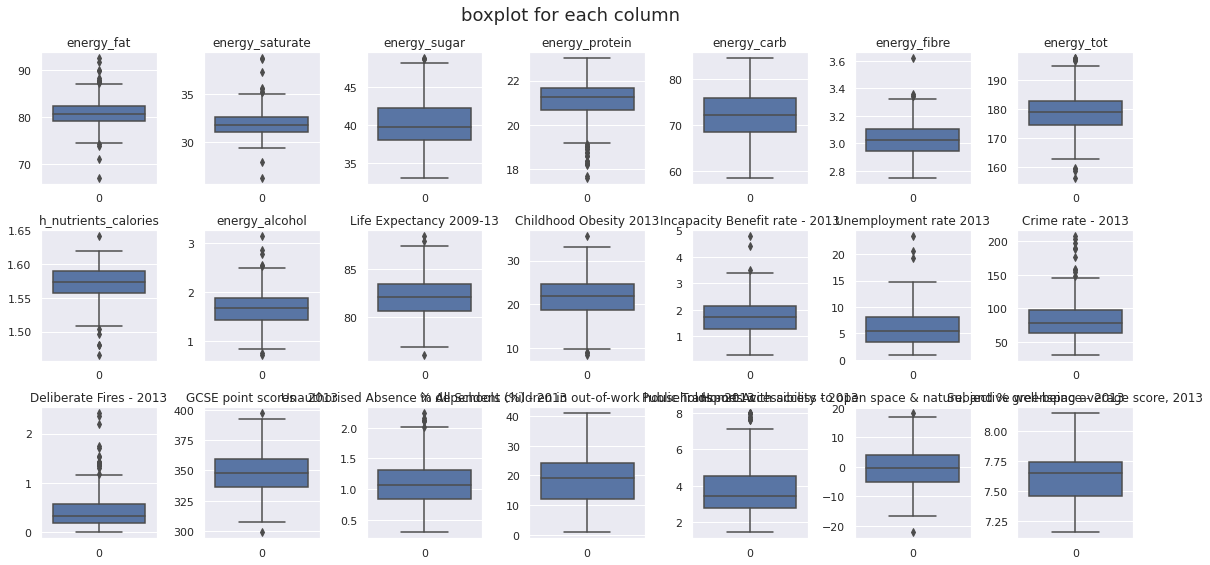

In [17]:
column_boxplot = ['energy_fat', 'energy_saturate', 'energy_sugar', 'energy_protein', 'energy_carb', 'energy_fibre', 'energy_tot',
                  'h_nutrients_calories', "energy_alcohol", 'Life Expectancy 2009-13', 'Childhood Obesity 2013', 'Incapacity Benefit rate - 2013',
                  'Unemployment rate 2013', 'Crime rate - 2013', 'Deliberate Fires - 2013', 'GCSE point scores - 2013',
                  'Unauthorised Absence in All Schools (%) - 2013', '% dependent children in out-of-work households - 2013',
                  'Public Transport Accessibility - 2013', 'Homes with access to open space & nature, and % greenspace - 2013',
                  'Subjective well-being average score, 2013']
wellbeing_grocery_analysis = wellbeing_grocery[column_boxplot].copy()
fig, ax = plt.subplots(3, 7, figsize=(16, 8), sharey=False)

for i in range(21):
    sbplt = ax[int(i/7), i % 7]

    sns.boxplot(data=wellbeing_grocery_analysis.iloc[:, i], ax=sbplt)
    sbplt.set_title('')
    sbplt.set_xlabel('')
    sbplt.set_ylabel('')
    sbplt.set_title(wellbeing_grocery_analysis.columns[i], wrap=True)

fig.tight_layout()
fig.subplots_adjust(top=0.9)

fig.suptitle('boxplot for each column', fontsize=18)

We observe that they are some outliers for the different variables. This is due to the differences between the different ward. 

Text(0.5, 0.98, 'boxplot for each column')

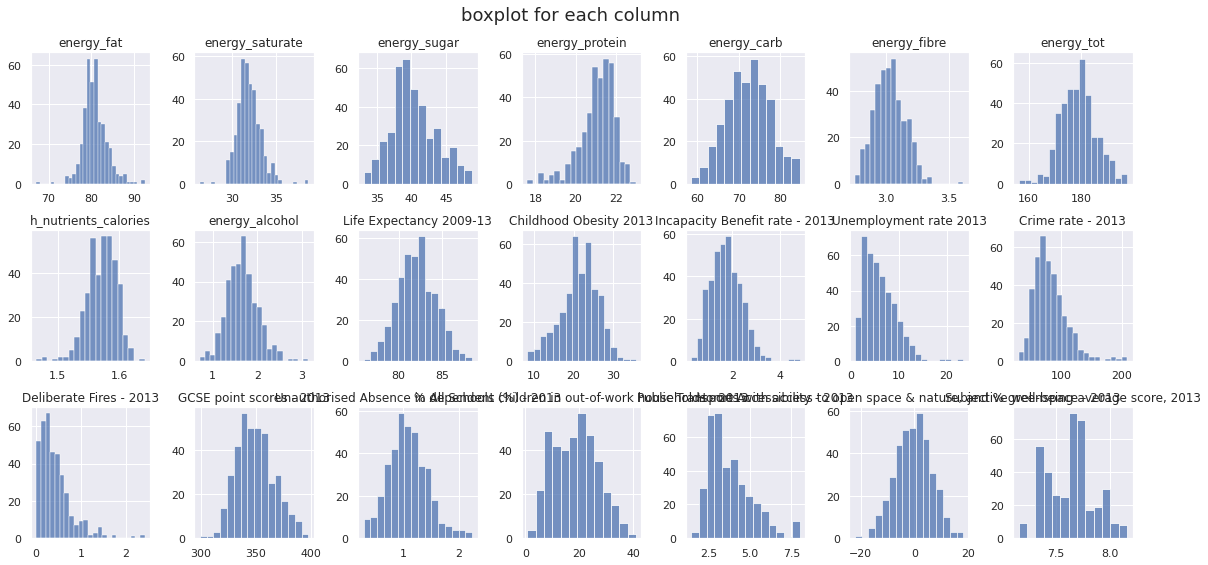

In [18]:
fig, ax = plt.subplots(3, 7, figsize=(16, 8), sharey=False)

for i in range(21):
    sbplt = ax[int(i/7), i % 7]

    sns.histplot(data=wellbeing_grocery_analysis.iloc[:, i], ax=sbplt)
    sbplt.set_title('')
    sbplt.set_xlabel('')
    sbplt.set_ylabel('')
    sbplt.set_title(wellbeing_grocery_analysis.columns[i], wrap=True)

fig.tight_layout()
fig.subplots_adjust(top=0.9)

fig.suptitle('boxplot for each column', fontsize=18)

In [19]:
correlation = wellbeing_grocery_analysis.corr(method="spearman")
display(correlation)

,energy_fat,energy_saturate,energy_sugar,energy_protein,energy_carb,energy_fibre,energy_tot,h_nutrients_calories,energy_alcohol,Life Expectancy 2009-13,...,Incapacity Benefit rate - 2013,Unemployment rate 2013,Crime rate - 2013,Deliberate Fires - 2013,GCSE point scores - 2013,Unauthorised Absence in All Schools (%) - 2013,% dependent children in out-of-work households - 2013,Public Transport Accessibility - 2013,"Homes with access to open space & nature, and % greenspace - 2013","Subjective well-being average score, 2013"
energy_fat,1.000000,0.796693,0.527196,-0.041212,0.527379,-0.008725,0.761701,-0.562012,-0.308710,-0.137417,...,0.062338,0.151570,-0.028526,0.175182,-0.061561,0.025604,-0.000578,-0.265494,0.215680,0.167940
energy_saturate,0.796693,1.000000,0.428125,-0.159860,0.319191,-0.055408,0.505713,-0.417357,-0.167755,0.074008,...,-0.077020,-0.053773,-0.175901,-0.001782,0.061991,-0.136579,-0.167906,-0.272443,0.183640,0.023547
energy_sugar,0.527196,0.428125,1.000000,-0.492845,0.842471,-0.274617,0.786331,-0.764175,-0.371369,-0.089384,...,-0.018262,0.076691,-0.259909,0.316143,-0.033672,-0.070203,-0.020689,-0.508868,0.052129,0.055544
energy_protein,-0.041212,-0.159860,-0.492845,1.000000,-0.298508,0.351441,-0.130697,0.527406,0.276859,-0.043483,...,0.090964,-0.067085,0.150237,-0.112694,0.010151,0.008579,0.058068,0.120778,0.096631,0.064959
energy_carb,0.527379,0.319191,0.842471,-0.298508,1.000000,-0.338144,0.931828,-0.857456,-0.567427,-0.203704,...,0.178339,0.306873,-0.138731,0.424421,-0.181687,0.092207,0.135367,-0.516706,0.026060,0.042280
energy_fibre,-0.008725,-0.055408,-0.274617,0.351441,-0.338144,1.000000,-0.224835,0.390672,0.143729,0.415848,...,-0.447686,-0.664928,-0.280210,-0.396147,0.521329,-0.543836,-0.560713,-0.078856,-0.004183,-0.055424
energy_tot,0.761701,0.505713,0.786331,-0.130697,0.931828,-0.224835,1.000000,-0.790633,-0.493803,-0.212409,...,0.170412,0.289020,-0.095649,0.386870,-0.161866,0.087323,0.114007,-0.486344,0.123468,0.105100
h_nutrients_calories,-0.562012,-0.417357,-0.764175,0.527406,-0.857456,0.390672,-0.790633,1.000000,0.797072,0.189441,...,-0.188631,-0.371761,0.104732,-0.356067,0.204547,-0.144217,-0.163817,0.405624,0.001567,-0.015933
energy_alcohol,-0.308710,-0.167755,-0.371369,0.276859,-0.567427,0.143729,-0.493803,0.797072,1.000000,0.110755,...,-0.203331,-0.312746,0.089384,-0.214385,0.155280,-0.131321,-0.157909,0.266417,0.066115,0.007167
Life Expectancy 2009-13,-0.137417,0.074008,-0.089384,-0.043483,-0.203704,0.415848,-0.212409,0.189441,0.110755,1.000000,...,-0.541540,-0.618426,-0.436128,-0.358241,0.460735,-0.507789,-0.640787,-0.209296,-0.066857,-0.238753


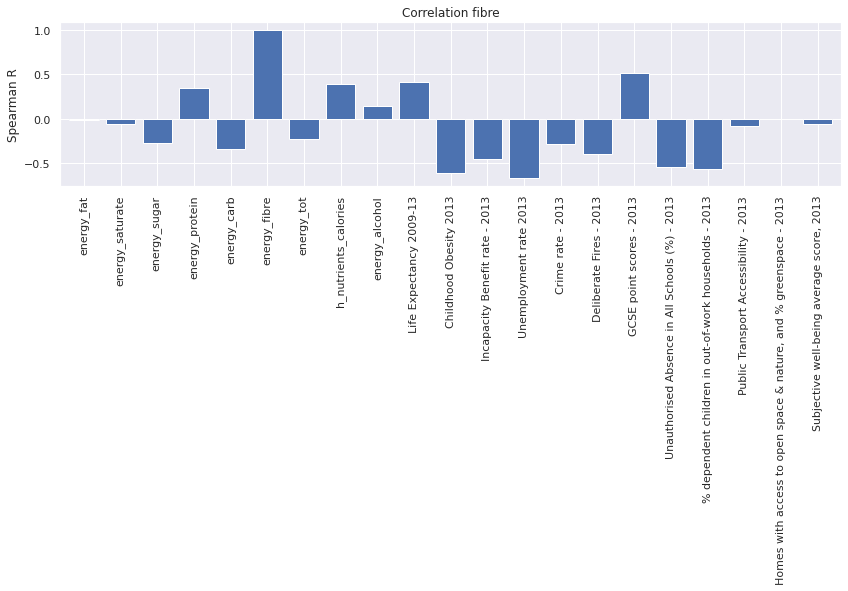

In [20]:
plt.figure(figsize=(14, 3))
correlation["energy_fibre"].plot.bar(x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation fibre")
plt.show()

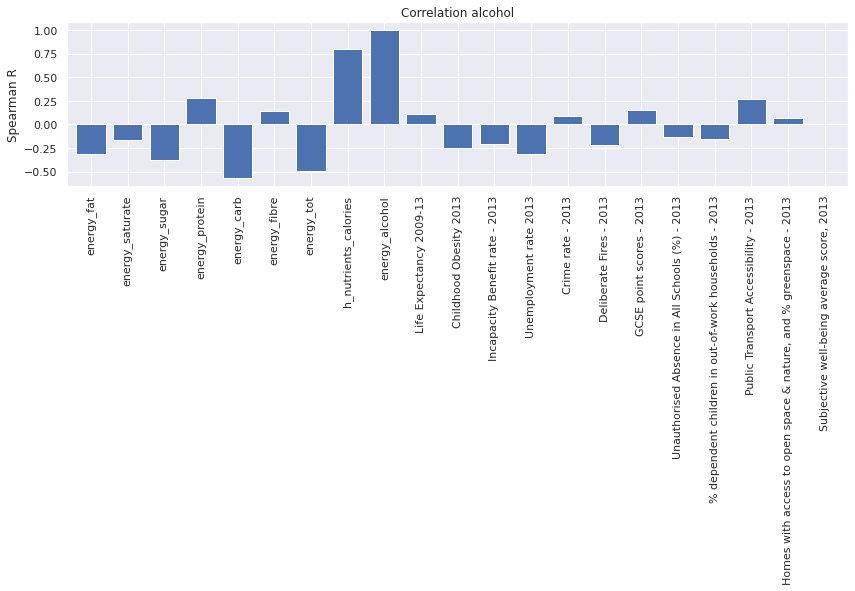

In [21]:
plt.figure(figsize=(14, 3))
correlation["energy_alcohol"].plot.bar(x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation alcohol")
plt.show()

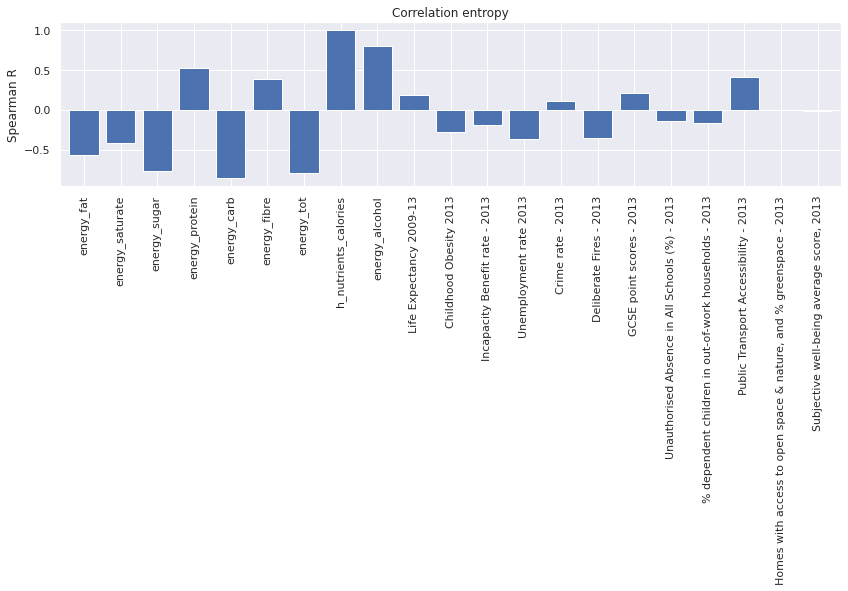

In [22]:
plt.figure(figsize=(14, 3))
correlation["h_nutrients_calories"].plot.bar(
    x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation entropy")
plt.show()

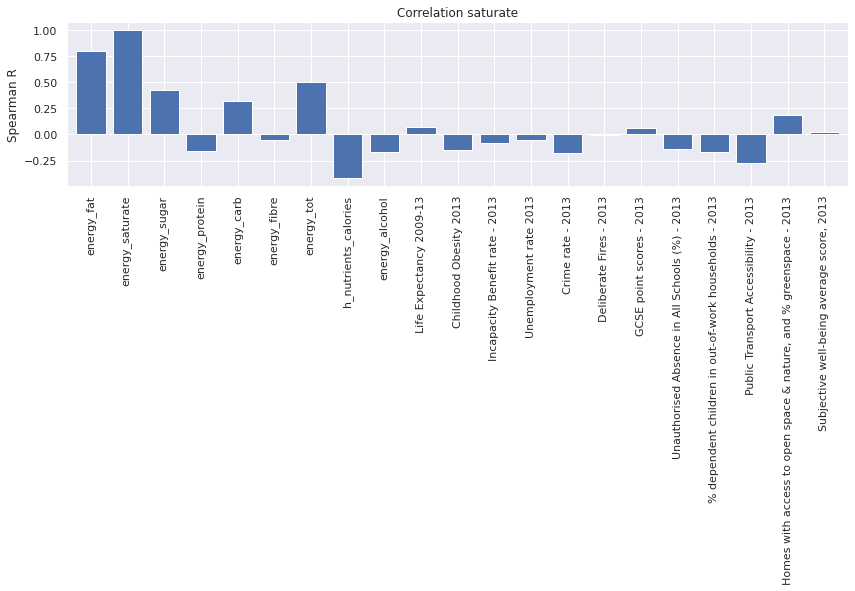

In [23]:
plt.figure(figsize=(14, 3))
correlation["energy_saturate"].plot.bar(x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation saturate")
plt.show()

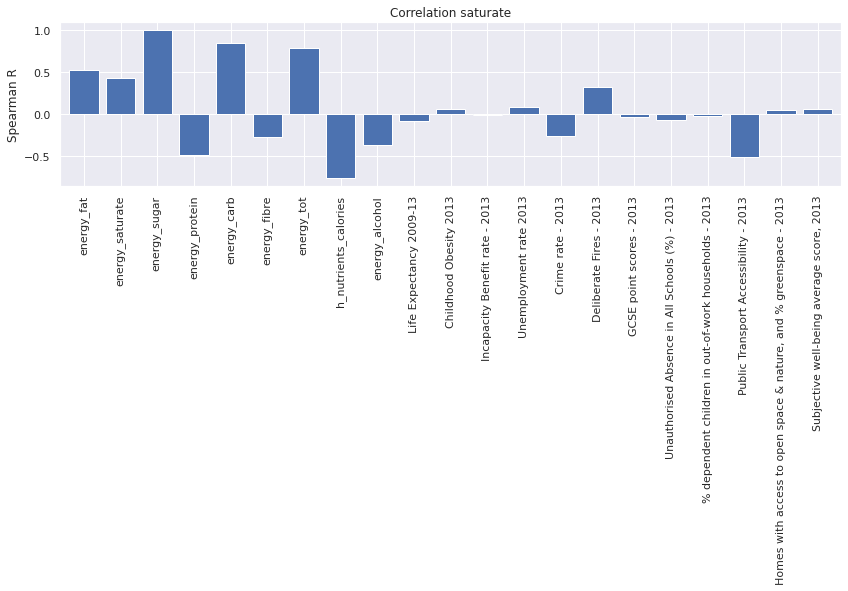

In [24]:
plt.figure(figsize=(14, 3))
correlation["energy_sugar"].plot.bar(x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation saturate")
plt.show()

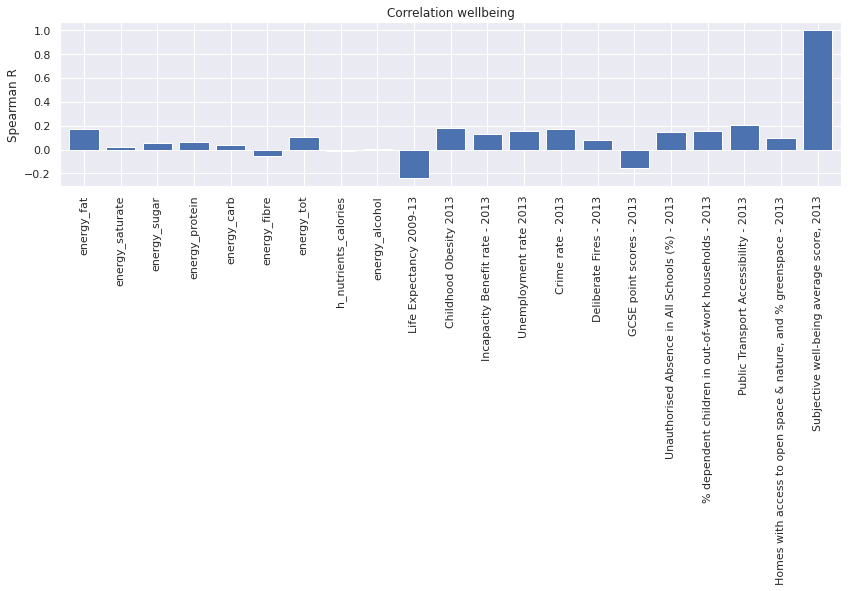

In [25]:
plt.figure(figsize=(14, 3))
correlation["Subjective well-being average score, 2013"].plot.bar(
    x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation wellbeing")
plt.show()

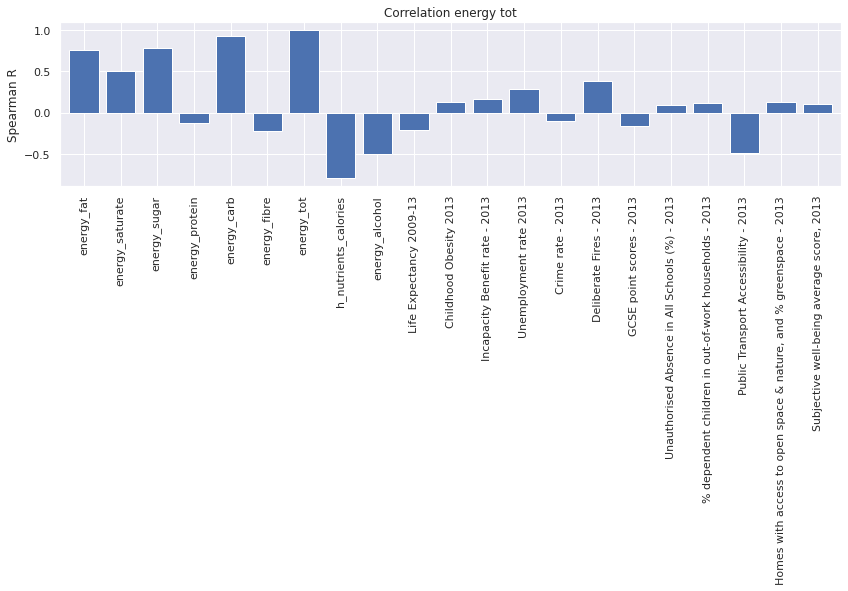

In [26]:
plt.figure(figsize=(14, 3))
correlation["energy_tot"].plot.bar(x=None, y=None, width=0.8, legend=None)
plt.ylabel("Spearman R")
plt.title("Correlation energy tot")
plt.show()

In [27]:
scaler = StandardScaler()
wellbeing_grocery_analysis[wellbeing_grocery_analysis.columns] = scaler.fit_transform(wellbeing_grocery_analysis
                                                                                      [wellbeing_grocery_analysis.columns])
display(wellbeing_grocery_analysis)

,energy_fat,energy_saturate,energy_sugar,energy_protein,energy_carb,energy_fibre,energy_tot,h_nutrients_calories,energy_alcohol,Life Expectancy 2009-13,...,Incapacity Benefit rate - 2013,Unemployment rate 2013,Crime rate - 2013,Deliberate Fires - 2013,GCSE point scores - 2013,Unauthorised Absence in All Schools (%) - 2013,% dependent children in out-of-work households - 2013,Public Transport Accessibility - 2013,"Homes with access to open space & nature, and % greenspace - 2013","Subjective well-being average score, 2013"
0,-0.690959,0.376043,-0.491361,0.393937,-0.202659,-0.296651,-0.382249,0.456124,0.197466,0.806853,...,-0.356320,-1.038528,-1.238982,-0.038116,0.531195,-1.345823,-0.928462,-1.309256,0.635141,0.076709
1,1.323973,1.464935,-1.293493,1.049630,-0.454832,0.306046,0.338901,0.150704,0.069645,-0.644301,...,0.326716,0.370440,1.239225,-0.554569,0.162358,-0.244130,-0.483987,1.272879,-0.376507,0.483486
2,-0.097301,-0.187593,-2.068903,1.191569,-2.070389,0.971904,-1.446329,1.091091,0.048285,0.079871,...,-0.145361,-0.511755,-1.218754,-0.948416,1.542859,-0.010793,-0.665646,1.693928,-1.393095,1.055853
3,-1.149098,-0.994454,-1.417441,1.443306,-0.993946,-0.365797,-1.037005,1.177555,0.253578,-0.447236,...,0.941736,0.850216,0.873433,-0.802546,0.097545,-0.666597,0.953563,1.892125,-1.327973,0.249669
4,0.762888,1.019146,-0.806335,0.283986,-0.148162,-0.679825,0.180304,-0.512884,-0.868582,-0.254930,...,0.594768,0.322997,0.104274,-0.129021,-1.009636,0.162337,-0.568389,0.424640,1.066152,0.483486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0.575549,-0.114642,2.193807,0.011673,1.920951,0.147528,1.681299,-0.980578,-0.471543,-0.303212,...,0.127512,-0.056796,0.265641,5.347058,-0.338394,1.605579,1.039091,-1.242935,1.814336,-0.273281
383,1.252000,1.145159,1.565450,-0.467474,1.227830,-0.527937,1.383518,-0.892390,0.075165,-0.351371,...,0.594768,-0.305263,-0.122172,3.005291,-2.418589,1.136178,0.653334,-0.925976,-0.366401,0.366791
384,1.936447,1.861889,0.611371,-0.537819,0.635041,1.210709,1.183233,-1.115928,-0.925267,0.610332,...,-0.659337,-0.505544,-0.666797,0.117310,0.402743,-0.161588,0.066185,-1.095620,0.997479,-0.847603
385,1.279531,0.461165,1.565574,0.161852,1.157477,-0.546945,1.346868,-1.305249,-1.417187,-1.306391,...,0.299569,0.675788,-0.766057,1.853138,0.060818,0.331989,0.600929,-1.109108,0.929782,-0.417916


In [28]:
mod = smf.ols(formula='h_nutrients_calories ~   Q("Life Expectancy 2009-13")+Q("Incapacity Benefit rate - 2013") +Q("Unemployment rate 2013")+ Q("Crime rate - 2013")+ Q("Childhood Obesity 2013")', data=wellbeing_grocery_analysis)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     h_nutrients_calories   R-squared:                       0.242
Model:                              OLS   Adj. R-squared:                  0.232
Method:                   Least Squares   F-statistic:                     24.33
Date:                  Wed, 02 Dec 2020   Prob (F-statistic):           2.90e-21
Time:                          19:57:26   Log-Likelihood:                -495.51
No. Observations:                   387   AIC:                             1003.
Df Residuals:                       381   BIC:                             1027.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [29]:
mod = smf.ols(formula='energy_fibre ~  Q("Life Expectancy 2009-13")+Q("Incapacity Benefit rate - 2013") +Q("Unemployment rate 2013")+ Q("Crime rate - 2013")+ Q("Childhood Obesity 2013")+ Q("Homes with access to open space & nature, and % greenspace - 2013")', data=wellbeing_grocery_analysis)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           energy_fibre   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     50.34
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.97e-45
Time:                        19:57:26   Log-Likelihood:                -435.94
No. Observations:                 387   AIC:                             885.9
Df Residuals:                     380   BIC:                             913.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [30]:
numerical_wellbeing_data_columns = ['Life Expectancy 2009-13', 'Childhood Obesity 2013', 'Incapacity Benefit rate - 2013',
                                    'Unemployment rate 2013', 'Crime rate - 2013', 'Deliberate Fires - 2013', 'GCSE point scores - 2013',
                                    'Unauthorised Absence in All Schools (%) - 2013', '% dependent children in out-of-work households - 2013',
                                    'Public Transport Accessibility - 2013', 'Homes with access to open space & nature, and % greenspace - 2013',
                                    'Subjective well-being average score, 2013']
wellbeing_data_analysis = wellbeing_data[numerical_wellbeing_data_columns].dropna(
).copy()
wellbeing_data_reduced_pca = PCA(n_components=2).fit(
    wellbeing_data_analysis).transform(wellbeing_data_analysis)

print("The features of the first sample are: %s" %
      wellbeing_data_reduced_pca[0])

The features of the first sample are: [-67.9202766   12.96362369]


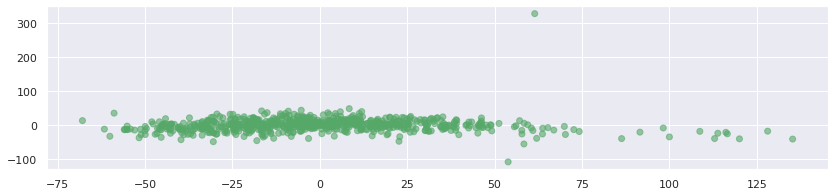

In [31]:
labels = wellbeing_data_analysis.apply(
    lambda row: "g" if row["Subjective well-being average score, 2013"] >= 0 else "r", axis=1)
# Plot the data reduced in 2d space with PCA
plt.figure(figsize=(14, 3))
plt.scatter(wellbeing_data_reduced_pca[:, 0],
            wellbeing_data_reduced_pca[:, 1], c=labels, alpha=0.6)

In [32]:
wellbeing_scores_columns = wellbeing_scores.columns.values.tolist()
print(wellbeing_scores_columns)

['New ward code', 'Ward name', 'Borough', 'Life Expectancy', 'Childhood Obesity', 'Incapacity Benefit rate', 'Unemployment rate', 'Crime rate - Index', 'Deliberate Fires', 'Average Capped GCSE and Equivalent Point Score Per Pupil', 'Unauthorised Absence in All Schools (%)', 'Dependent children in out-of-work families', 'Public Transport Accessibility', 'Homes with access to open space & nature, and % greenspace', 'Subjective well-being average score', 'Index Score 2013']


In [33]:
numerical_wellbeing_scores_columns = ['Life Expectancy', 'Childhood Obesity', 'Incapacity Benefit rate', 'Unemployment rate',
                                      'Crime rate - Index', 'Deliberate Fires',
                                      'Average Capped GCSE and Equivalent Point Score Per Pupil',
                                      'Unauthorised Absence in All Schools (%)', 'Dependent children in out-of-work families',
                                      'Public Transport Accessibility',
                                      'Homes with access to open space & nature, and % greenspace',
                                      'Subjective well-being average score', 'Index Score 2013']
wellbeing_scores_analysis = wellbeing_scores[numerical_wellbeing_scores_columns].dropna(
).copy()
wellbeing_scores_reduced_pca = PCA(n_components=2).fit(
    wellbeing_scores_analysis).transform(wellbeing_scores_analysis)

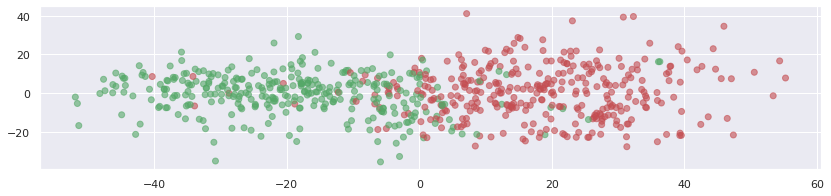

In [34]:
labels = wellbeing_scores_analysis.apply(
    lambda row: "g" if row['Index Score 2013'] >= 0 else "r", axis=1)
# Plot the data reduced in 2d space with PCA
plt.figure(figsize=(14, 3))
plt.scatter(wellbeing_scores_reduced_pca[:, 0],
            wellbeing_scores_reduced_pca[:, 1], c=labels, alpha=0.6)

In [35]:
# create map https://sensitivecities.com/so-youd-like-to-make-a-map-using-python-EN.html#.X8d8vqpKhN0